In [83]:
import numpy as np 
import torch
from matplotlib import pyplot as plt 
import matplotlib 
plt.rcParams['font.family'] = 'DeJavu Serif' 
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import warnings
warnings.filterwarnings('ignore')

In [234]:
n = 100 

f = np.arange(0,n//2)

kappa = f/(n-2*f) * (1+ f/(n-2*f))   

lam_star = 1 - kappa/(kappa + 1 - 1/(n-f)) 

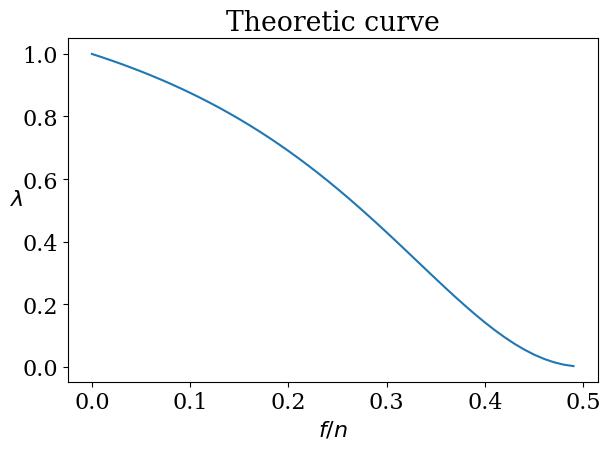

In [235]:
plt.plot(f/n, lam_star)
plt.title("Theoretic curve")
plt.xlabel(r"$f/n$")
plt.ylabel(r"$\lambda$",  rotation='horizontal')
plt.show()

In [5]:
import sys
sys.path.append('../ByzLibrary')
from robust_aggregators import RobustAggregator
from byz_attacks import ByzantineAttack

In [224]:
np.random.seed(42)

In [225]:
n = 100
f_list = np.arange(0,n//2, 10)
lam_list  = torch.linspace(0,1, 10)
m = 100
sigma = 50
mu = 10
lam_star_practice = []
for f in f_list:
    aggregation_rule = RobustAggregator('trmean', None, 1, n, f, 0, 1, 'cpu')
    attack = ByzantineAttack("SF", f, 1, 'cpu', learning_phase = 0, gradient_clip = 1, robust_aggregator = aggregation_rule)
    X_honest = np.random.randn(n-f, m)*sigma+mu
    X_h = torch.Tensor(X_honest)
    X_h = list(X_h)
    X_byzantine = attack.generate_byzantine_vectors(X_h, None, 1)
    #X_byzantine = np.random.randn(f,m)*sigma_biz + mu_biz
    X = X_byzantine + X_h
    pu_pred = aggregation_rule.aggregate(X).mean()
    lam_star_practice.append(np.argmin( np.abs( (1-lam_list)  * X[-1].mean() + lam_list * pu_pred - mu) ).item())

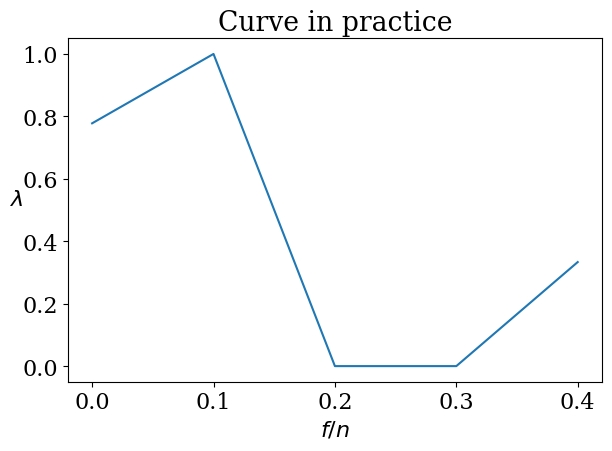

In [227]:
plt.plot(f_list/n, lam_list[lam_star_practice])
plt.title("Curve in practice")
plt.xlabel(r"$f/n$")
plt.ylabel(r"$\lambda$",  rotation='horizontal')
plt.ylim(-0.05,1.05)
plt.show()

In [221]:
np.random.seed(42)

In [232]:
n = 200
f_list = np.arange(0,n//2, 10)
lam_list  = torch.linspace(0,1, 11)
m = 50
sigma = 20
mu = 10

n_exp=20
errors = np.zeros((n_exp, len(f_list), len(lam_list)))
for it in range(n_exp):
    for i,f in enumerate(f_list):
        aggregation_rule = RobustAggregator('trmean', None, 1, n, f, 0, 1, 'cpu')
        attack = ByzantineAttack("SF", f, 1, 'cpu', learning_phase = 0, gradient_clip = 1, robust_aggregator = aggregation_rule)
        X_honest = np.random.randn(n-f, m)*sigma+mu
        X_h = torch.Tensor(X_honest)
        X_h = list(X_h)
        X_byzantine = attack.generate_byzantine_vectors(X_h, None, 1)
        #X_byzantine = np.random.randn(f,m)*sigma_biz + mu_biz
        X = X_byzantine + X_h
        pu_pred = aggregation_rule.aggregate(X).mean()
        errors[it, i] = np.abs((1-lam_list) * X[-1].mean() + lam_list * pu_pred - mu)
        #lam_star_practice[it, i] = np.argmin( np.abs((1-lam_list) * X[-1].mean() + lam_list * pu_pred - mu) )
        #lam_star_practice.append(np.argmin( np.abs(lam_list * X[-1].mean() + (1-lam_list) * pu_pred - mu) ))
avg_errors = errors.mean(0)
lam_star_idx = np.argmin(avg_errors, axis=1)
lam_star_practice = lam_list[lam_star_idx]

In [237]:
n = 100 

f = np.arange(0,n//2)

kappa = f/(n-2*f) * (1+ f/(n-2*f))   

lam_star = 1 - kappa/(kappa + 1 - 1/(n-f)) 

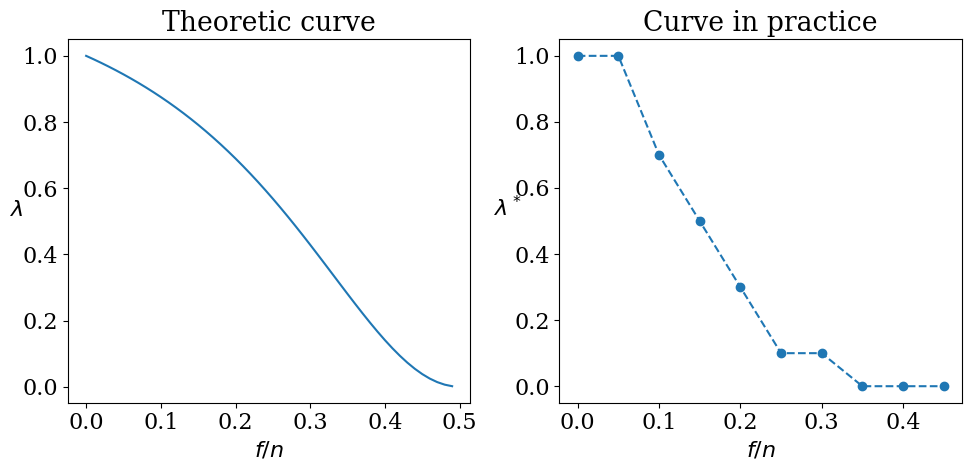

In [248]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

##### Theoretical figure 
n = 100 

f = np.arange(0,n//2)

kappa = f/(n-2*f) * (1+ f/(n-2*f))   

lam_star = 1 - kappa/(kappa + 1 - 1/(n-f)) 

ax[0].plot(f/n, lam_star)
ax[0].set_title("Theoretic curve")
ax[0].set_xlabel(r"$f/n$")
ax[0].set_ylabel(r"$\lambda$",  rotation='horizontal')


#### Experimental figure
n = 200
f_list = np.arange(0,n//2, 10)
lam_list  = torch.linspace(0,1, 11)
m = 50
sigma = 20
mu = 10



n_exp=20
errors = np.zeros((n_exp, len(f_list), len(lam_list)))
for it in range(n_exp):
    for i,f in enumerate(f_list):
        aggregation_rule = RobustAggregator('trmean', None, 1, n, f, 0, 1, 'cpu')
        attack = ByzantineAttack("SF", f, 1, 'cpu', learning_phase = 0, gradient_clip = 1, robust_aggregator = aggregation_rule)
        X_honest = np.random.randn(n-f, m)*sigma+mu
        X_h = torch.Tensor(X_honest)
        X_h = list(X_h)
        X_byzantine = attack.generate_byzantine_vectors(X_h, None, 1)
        #X_byzantine = np.random.randn(f,m)*sigma_biz + mu_biz
        X = X_byzantine + X_h
        pu_pred = aggregation_rule.aggregate(X).mean()
        errors[it, i] = np.abs((1-lam_list) * X[-1].mean() + lam_list * pu_pred - mu)
        #lam_star_practice[it, i] = np.argmin( np.abs((1-lam_list) * X[-1].mean() + lam_list * pu_pred - mu) )
        #lam_star_practice.append(np.argmin( np.abs(lam_list * X[-1].mean() + (1-lam_list) * pu_pred - mu) ))
avg_errors = errors.mean(0)
lam_star_idx = np.argmin(avg_errors, axis=1)
lam_star_practice = lam_list[lam_star_idx]


ax[1].plot(f_list/n, lam_star_practice, 'o--')
ax[1].set_title("Curve in practice")
ax[1].set_xlabel(r"$f/n$")
ax[1].set_ylabel(r"$\lambda^*$",  rotation='horizontal')
ax[1].set_ylim(-0.05,1.05)

plt.show()

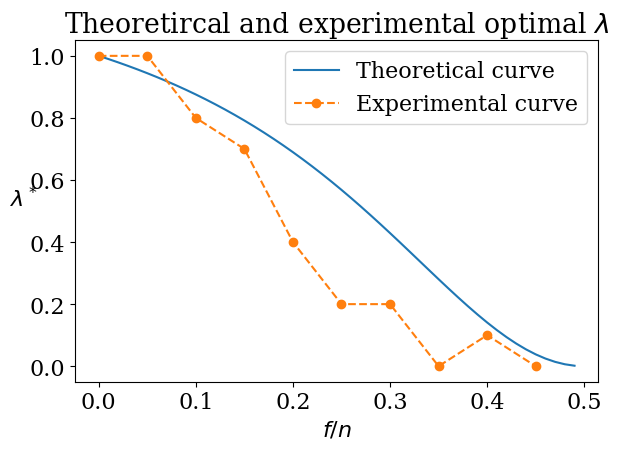

In [269]:

##### Theoretical figure 

n = 100 

f = np.arange(0,n//2)

kappa = f/(n-2*f) * (1+ f/(n-2*f))   

lam_star = 1 - kappa/(kappa + 1 - 1/(n-f)) 

plt.plot(f/n, lam_star, label = "Theoretical curve")
plt.title("Theoretircal and experimental optimal $\lambda$")
plt.xlabel(r"$f/n$")
plt.ylabel(r"$\lambda$",  rotation='horizontal')


#### Experimental figure
np.random.seed(0)
n = 200
f_list = np.arange(0,n//2, 10)
lam_list  = torch.linspace(0,1, 11)
m = 50
sigma = 30
mu = 10



n_exp=20
errors = np.zeros((n_exp, len(f_list), len(lam_list)))
for it in range(n_exp):
    for i,f in enumerate(f_list):
        aggregation_rule = RobustAggregator('trmean', None, 1, n, f, 0, 1, 'cpu')
        attack = ByzantineAttack("SF", f, 1, 'cpu', learning_phase = 0, gradient_clip = 1, robust_aggregator = aggregation_rule)
        X_honest = np.random.randn(n-f, m)*sigma+mu
        X_h = torch.Tensor(X_honest)
        X_h = list(X_h)
        X_byzantine = attack.generate_byzantine_vectors(X_h, None, 1)
        #X_byzantine = np.random.randn(f,m)*sigma_biz + mu_biz
        X = X_byzantine + X_h
        pu_pred = aggregation_rule.aggregate(X).mean()
        errors[it, i] = np.abs((1-lam_list) * X[-1].mean() + lam_list * pu_pred - mu)
        #lam_star_practice[it, i] = np.argmin( np.abs((1-lam_list) * X[-1].mean() + lam_list * pu_pred - mu) )
        #lam_star_practice.append(np.argmin( np.abs(lam_list * X[-1].mean() + (1-lam_list) * pu_pred - mu) ))
avg_errors = errors.mean(0)
lam_star_idx = np.argmin(avg_errors, axis=1)
lam_star_practice = lam_list[lam_star_idx]


plt.plot(f_list/n, lam_star_practice, 'o--', label = "Experimental curve")
plt.xlabel(r"$f/n$")
plt.ylabel(r"$\lambda^*$",  rotation='horizontal')
plt.ylim(-0.05,1.05)
plt.legend()
plt.savefig("experiments/mp_optimal_lambda")
plt.show()

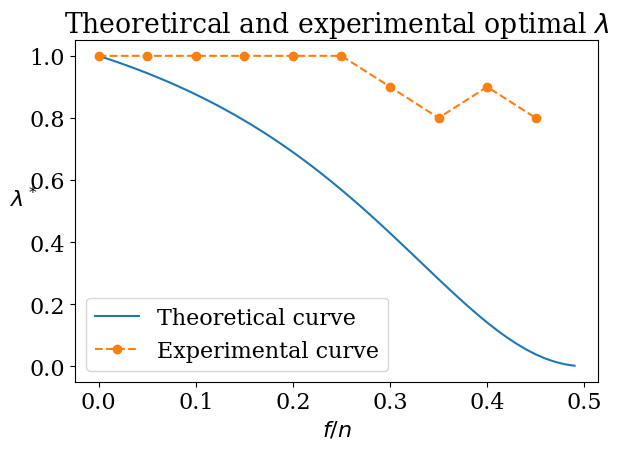

In [275]:
##### Theoretical figure 

n = 100 

f = np.arange(0,n//2)

kappa = f/(n-2*f) * (1+ f/(n-2*f))   

lam_star = 1 - kappa/(kappa + 1 - 1/(n-f)) 

plt.plot(f/n, lam_star, label = "Theoretical curve")
plt.title("Theoretircal and experimental optimal $\lambda$")
plt.xlabel(r"$f/n$")
plt.ylabel(r"$\lambda$",  rotation='horizontal')


#### Experimental figure
np.random.seed(42)
n = 200
f_list = np.arange(0,n//2, 10)
lam_list  = torch.linspace(0,1, 11)
m = 50
sigma = 30
mu = 1



n_exp=20
errors = np.zeros((n_exp, len(f_list), len(lam_list)))
for it in range(n_exp):
    for i,f in enumerate(f_list):
        aggregation_rule = RobustAggregator('trmean', None, 1, n, f, 0, 1, 'cpu')
        attack = ByzantineAttack("SF", f, 1, 'cpu', learning_phase = 0, gradient_clip = 1, robust_aggregator = aggregation_rule)
        X_honest = np.random.randn(n-f, m)*sigma+mu
        X_h = torch.Tensor(X_honest)
        X_h = list(X_h)
        X_byzantine = attack.generate_byzantine_vectors(X_h, None, 1)
        #X_byzantine = np.random.randn(f,m)*sigma_biz + mu_biz
        X = X_byzantine + X_h
        pu_pred = aggregation_rule.aggregate(X).mean()
        errors[it, i] = np.abs((1-lam_list) * X[-1].mean() + lam_list * pu_pred - mu)
        #lam_star_practice[it, i] = np.argmin( np.abs((1-lam_list) * X[-1].mean() + lam_list * pu_pred - mu) )
        #lam_star_practice.append(np.argmin( np.abs(lam_list * X[-1].mean() + (1-lam_list) * pu_pred - mu) ))
avg_errors = errors.mean(0)
lam_star_idx = np.argmin(avg_errors, axis=1)
lam_star_practice = lam_list[lam_star_idx]


plt.plot(f_list/n, lam_star_practice, 'o--', label = "Experimental curve")
plt.xlabel(r"$f/n$")
plt.ylabel(r"$\lambda^*$",  rotation='horizontal')
plt.ylim(-0.05,1.05)
plt.legend()
plt.savefig("experiments/mp_optimal_lambda")
plt.show()

In [184]:
lam_star_practice

tensor([1.0000, 0.2000, 0.0000, 0.0000, 0.0000])

In [161]:
np.random.seed(42)

In [164]:
n = 100
f_list = np.arange(0,n//2, 10)
lam_list  = torch.linspace(0,1, 10)
m = 100
sigma = 1
mu = 10

n_exp=20
lam_star_practice = np.zeros((n_exp, len(f_list)))
for i,f in enumerate(f_list):
    for it in range(n_exp):
        aggregation_rule = RobustAggregator('trmean', None, 1, n, f, 0, 1, 'cpu')
        attack = ByzantineAttack("SF", f, 1, 'cpu', learning_phase = 0, gradient_clip = 1, robust_aggregator = aggregation_rule)
        X_honest = np.random.randn(n-f, m)*sigma+mu
        X_h = torch.Tensor(X_honest)
        X_h = list(X_h)
        X_byzantine = attack.generate_byzantine_vectors(X_h, None, 1)
        #X_byzantine = np.random.randn(f,m)*sigma_biz + mu_biz
        X = X_byzantine + X_h
        pu_pred = aggregation_rule.aggregate(X).mean()
        lam_star_practice[it, i] = np.argmin( np.abs((1-lam_list) * X[-1].mean() + lam_list * pu_pred - mu) )
        #lam_star_practice.append(np.argmin( np.abs(lam_list * X[-1].mean() + (1-lam_list) * pu_pred - mu) ))

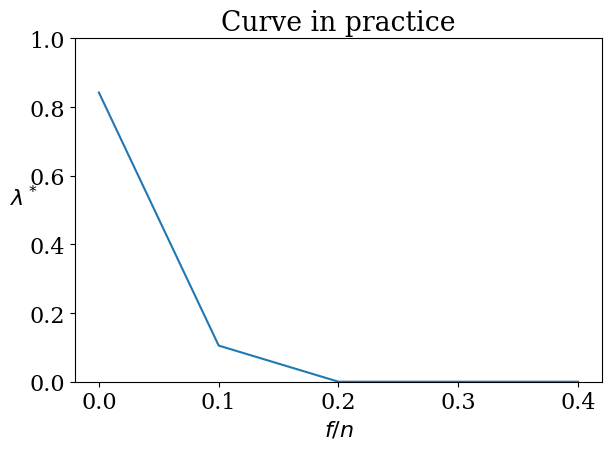

In [166]:
plt.plot(f_list/n, lam_list[lam_star_practice.mean(0)])
plt.title("Curve in practice")
plt.xlabel(r"$f/n$")
plt.ylabel(r"$\lambda^*$",  rotation='horizontal')
plt.ylim(-0.05,1.05)
plt.show()